In [1]:
# Source data: https://docs.google.com/spreadsheets/d/1Q6KiM2kosM1q1_NK-FzFjJ2o0mLS2YHe0sUkqTj6xbU/edit?gid=506716267#gid=506716267

import pandas as pd
from io import StringIO

data = """LLM,System,Rank,Score
qwen1.5-110B-Chat,LMC-EI (ours),1,65.6
gpt-4o-2024-05-13,LMC-EI (ours),2,59.2
claude-3-opus,LMC-EI (ours),3,50.1
qwen1.5-32B-Chat,LMC-EI (ours),4,50
llama-3-70b-chat,LMC-EI (ours),5,45.1
claude-3-haiku,LMC-EI (ours),6,38.6
mixtral-8x7b,LMC-EI (ours),7,34.4
llama-3-8b-chat,LMC-EI (ours),8,30
gpt-4-0613,LMC-EI (ours),9,44.2
qwen1.5-110B-Chat,Human Study,3,53
gpt-4o-2024-05-13,Human Study,2,54
claude-3-opus,Human Study,1,55.7
qwen1.5-32B-Chat,Human Study,4,50
llama-3-70b-chat,Human Study,5,49.7
claude-3-haiku,Human Study,6,49
mixtral-8x7b,Human Study,7,48.9
llama-3-8b-chat,Human Study,9,40
gpt-4-0613,Human Study,8,43.9
gpt-4o-2024-05-13,Chatbot Arena,1,1287
gpt-4-0613,Chatbot Arena,3,1246
mixtral-8x7b,Chatbot Arena,9,1114
llama-3-70b-chat,Chatbot Arena,4,1208
llama-3-8b-chat,Chatbot Arena,7,1153
claude-3-opus,Chatbot Arena,2,1248
claude-3-haiku,Chatbot Arena,5,1178
qwen1.5-110B-Chat,Chatbot Arena,6,1164
qwen1.5-32B-Chat,Chatbot Arena,8,1126
gpt-4o-2024-05-13,MMLU,1,88.7
gpt-4-0613,MMLU,3,86.4
mixtral-8x7b,MMLU,8,70.6
llama-3-70b-chat,MMLU,4,82.0
llama-3-8b-chat,MMLU,9,68.4
claude-3-opus,MMLU,2,86.8
claude-3-haiku,MMLU,6,75.2
qwen1.5-110B-Chat,MMLU,5,80.2
qwen1.5-32B-Chat,MMLU,7,74.3
gpt-4o-2024-05-13,EQ-Bench,3,83.51
gpt-4-0613,EQ-Bench,1,84.79
mixtral-8x7b,EQ-Bench,7,72.37
llama-3-70b-chat,EQ-Bench,5,82.13
llama-3-8b-chat,EQ-Bench,8,68.88
claude-3-opus,EQ-Bench,4,82.19
claude-3-haiku,EQ-Bench,9,63.65
qwen1.5-110B-Chat,EQ-Bench,2,83.68
qwen1.5-32B-Chat,EQ-Bench,6,75.59
gpt-4o-2024-05-13,Chatbot Arena mined EQ subset (n=100),1,79.56
gpt-4-0613,Chatbot Arena mined EQ subset (n=100),9,30.87
mixtral-8x7b,Chatbot Arena mined EQ subset (n=100),8,37.62
llama-3-70b-chat,Chatbot Arena mined EQ subset (n=100),2,77.21
llama-3-8b-chat,Chatbot Arena mined EQ subset (n=100),4,53.69
claude-3-opus,Chatbot Arena mined EQ subset (n=100),5,50.66
claude-3-haiku,Chatbot Arena mined EQ subset (n=100),7,40.94
qwen1.5-110B-Chat,Chatbot Arena mined EQ subset (n=100),3,69.35
qwen1.5-32B-Chat,Chatbot Arena mined EQ subset (n=100),6,50"""

df = pd.read_csv(StringIO(data))

In [24]:
spearman_corr.columns

Index(['Chatbot Arena', 'Chatbot Arena mined EQ subset (n=100)', 'EQ-Bench',
       'LMC-EI (ours)', 'MMLU', 'Human Study'],
      dtype='object', name='System')

In [29]:
# Print correlations
pivot_df = df.pivot(index='LLM', columns='System', values='Score')
spearman_corr = pivot_df.corr(method='spearman')

# Reorder the matrix to have 'Human Study' last
system_order = ['EQ-Bench', 'Chatbot Arena', 'Chatbot Arena mined EQ subset (n=100)', 'MMLU', 'LMC-EI (ours)', 'Human Study']
spearman_corr = spearman_corr.loc[system_order, system_order]
spearman_corr

System,EQ-Bench,Chatbot Arena,Chatbot Arena mined EQ subset (n=100),MMLU,LMC-EI (ours),Human Study
System,,,,,,
EQ-Bench,1.000000,0.550000,0.166667,0.716667,0.683333,0.383333
Chatbot Arena,0.550000,1.000000,0.366667,0.933333,0.483333,0.483333
Chatbot Arena mined EQ subset (n=100),0.166667,0.366667,1.000000,0.333333,0.533333,0.516667
MMLU,0.716667,0.933333,0.333333,1.000000,0.683333,0.650000
LMC-EI (ours),0.683333,0.483333,0.533333,0.683333,1.000000,0.883333
Human Study,0.383333,0.483333,0.516667,0.650000,0.883333,1.000000


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
/var/folders/0l/w386mdy110s1ks79j0qfrccc0000gn/T/ipykernel_24300/4064787605.py:13: SyntaxWarning: invalid escape sequence '\m'
  annot.loc[i, j] = f'$\mathbf{{{value:.2f}}}$'
/var/folders/0l/w386mdy110s1ks79j0qfrccc0000gn/T/ipykernel_24300/4064787605.py:28: SyntaxWarning: invalid escape sequence '\m'
  ax.set_yticklabels([f'$\mathbf{{{label}}}$' if label == 'Human Study' else label for label in labels], fontsize=14, rotation=0)


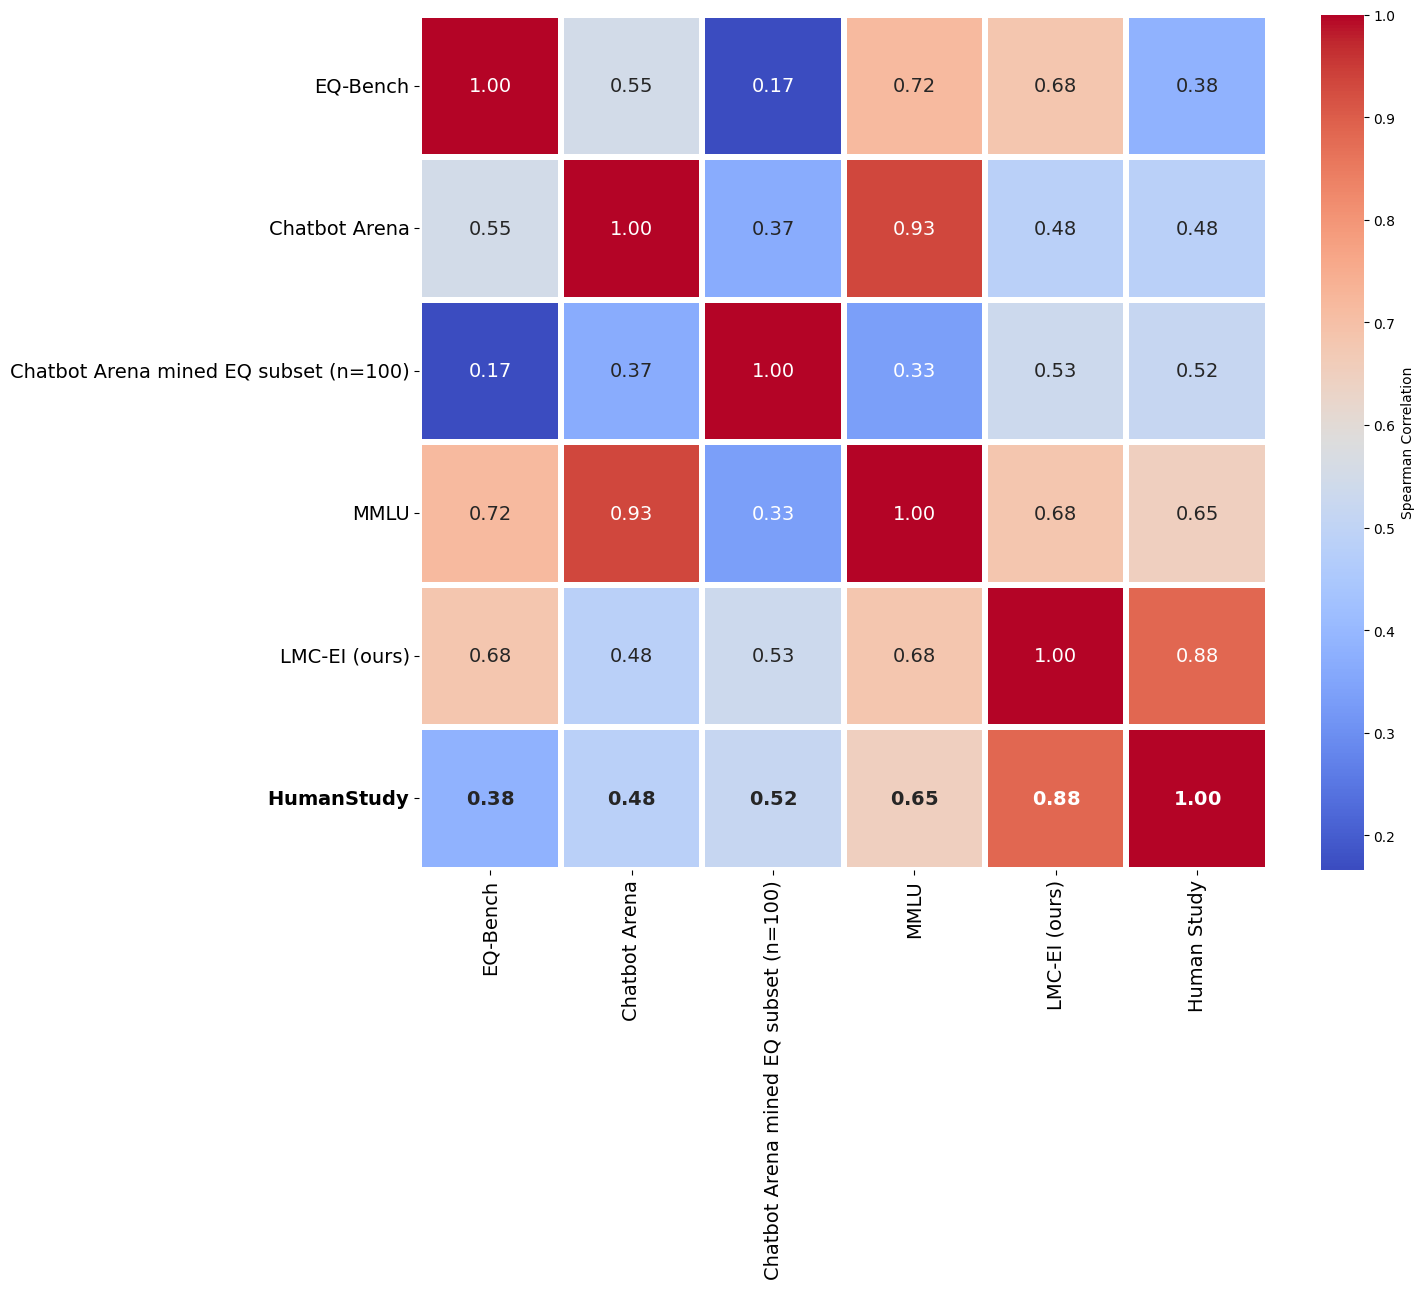

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom annotation DataFrame
annot = spearman_corr.copy().astype(str)

# Apply the custom style to the annotations
for i in spearman_corr.index:
    for j in spearman_corr.columns:
        value = spearman_corr.loc[i, j]
        # if i == 'Human Study' or j == 'Human Study':
        if i == 'Human Study':
            annot.loc[i, j] = f'$\mathbf{{{value:.2f}}}$'
        else:
            annot.loc[i, j] = f'{value:.2f}'

# Plot the heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(spearman_corr, annot=annot, cmap='coolwarm', linewidths=3, fmt='',
            annot_kws={"size": 14}, cbar_kws={'label': 'Spearman Correlation'})

# Modify the axis labels to bold "Human Study"
ax = plt.gca()  # Get the current axis

# Bold the 'Human Study' label on the x-axis
# Bold the 'Human Study' label on the y-axis
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels([f'$\mathbf{{{label}}}$' if label == 'Human Study' else label for label in labels], fontsize=14, rotation=0)

plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.savefig("/Users/justinzhao/Repos/llm-council-public/analysis/leaderboard_comparison.png")
plt.show()

System,Chatbot Arena,Chatbot Arena mined EQ subset (n=100),EQ-Bench,LMC-EI (ours),MMLU,Human Study
System,,,,,,
Chatbot Arena,1.000000,0.366667,0.550000,0.483333,0.933333,0.483333
Chatbot Arena mined EQ subset (n=100),0.366667,1.000000,0.166667,0.533333,0.333333,0.516667
EQ-Bench,0.550000,0.166667,1.000000,0.683333,0.716667,0.383333
LMC-EI (ours),0.483333,0.533333,0.683333,1.000000,0.683333,0.883333
MMLU,0.933333,0.333333,0.716667,0.683333,1.000000,0.650000
Human Study,0.483333,0.516667,0.383333,0.883333,0.650000,1.000000
